# Лабораторная работа №5. Классификация 2024

## Цель работы

Изучение алгоритмов и методов классификации на практике.

## Выполнение работы

### Предварительная обработка данных

Производится загрузка CSV файла и вывод первых 5 строк.

In [1]:
import pandas as pd
liver = pd.read_csv('datasets/2liver.csv', sep=',')
liver.head()

,Age,Gender,TotalBilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset123
0,65,Female,0.7,0.1,187.0,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699.0,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490.0,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182.0,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195.0,27,59,7.3,2.4,0.40,1


Набор данных `2liver.csv`
Содержит информацию о заболеваемости печени:
1. Возраст пациента
2. Пол пациента
3. Общий билирубин
4. Прямой билирубин
5. Щелочная фосфатаза
6. Аламиноаминотрансфераза
7. Аспартатаминотрансфераза
8. Всего белков
9. Альбумин
10. Соотношение альбуминов и глобулинов
11. Целевое поле: два значения - пациент с заболеванием печени или без заболевания.

Проводится предварительная обработка данных.

Для начала выводится общая информация о датасете.

In [2]:
liver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         587 non-null    int64  
 1   Gender                      587 non-null    object 
 2   TotalBilirubin              585 non-null    float64
 3   Direct_Bilirubin            587 non-null    float64
 4   Alkaline_Phosphotase        586 non-null    float64
 5   Alamine_Aminotransferase    587 non-null    int64  
 6   Aspartate_Aminotransferase  587 non-null    object 
 7   Total_Protiens              587 non-null    float64
 8   Albumin                     587 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Dataset123                  587 non-null    object 
dtypes: float64(6), int64(2), object(3)
memory usage: 50.6+ KB


Значения столбца `Aspartate_Aminotransferase` приводятся к типу `float64`.

In [3]:
liver['Aspartate_Aminotransferase'] = pd.to_numeric(liver['Aspartate_Aminotransferase'], errors='coerce')
liver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         587 non-null    int64  
 1   Gender                      587 non-null    object 
 2   TotalBilirubin              585 non-null    float64
 3   Direct_Bilirubin            587 non-null    float64
 4   Alkaline_Phosphotase        586 non-null    float64
 5   Alamine_Aminotransferase    587 non-null    int64  
 6   Aspartate_Aminotransferase  586 non-null    float64
 7   Total_Protiens              587 non-null    float64
 8   Albumin                     587 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Dataset123                  587 non-null    object 
dtypes: float64(7), int64(2), object(2)
memory usage: 50.6+ KB


Датасет проверется на наличие пропущенных значений.

In [4]:
liver.isna().sum()

Age                           0
Gender                        0
TotalBilirubin                2
Direct_Bilirubin              0
Alkaline_Phosphotase          1
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    1
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset123                    0
dtype: int64

Чтобы модель правильно классифицировала наблюдения, вместо заполнения пустых полей они просто удаляются, так как их очень мало.

In [5]:
liver = liver.dropna()
liver.isna().sum()

Age                           0
Gender                        0
TotalBilirubin                0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset123                    0
dtype: int64

Проверяется корректность заголовков столбцов.

In [6]:
liver.columns

Index(['Age', 'Gender', 'TotalBilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset123'],
      dtype='object')

Столбец `Dataset123` переименовывается в `Disease`.

In [7]:
liver = liver.rename(columns = {'Dataset123':'Disease'})
liver.columns

Index(['Age', 'Gender', 'TotalBilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Disease'],
      dtype='object')

Далее производится проверка на явные дубликаты.

In [8]:
liver.duplicated().sum()

15

Дубликаты удаляются, после чего обновляется нумерация индексов.

In [9]:
liver = liver.drop_duplicates()
liver = liver.reset_index(drop=True)
liver.duplicated().sum()

0

Далее производится проверка на наличие неявных дубликатов.

In [10]:
print(liver['Gender'].unique(),
      liver['Disease'].unique())

['Female' 'Male' 'Mal'] ['1' '2' 'yes']


Перед устранением неявных дубликатов необходимо определить какое из значений "1" и "2" означает, что человек болен, а какое - не болен. Для этого подсчитывается кол-во наблюдений с обоими признаками.

In [11]:
print("1 -", (liver['Disease'] == '1').sum())
print("2 -", (liver['Disease'] == '2').sum())
print("yes -", (liver['Disease'] == 'yes').sum())

1 - 402
2 - 161
yes - 1


Так как по статистике в наблюдениях реже встречается статус "болен" можно сделать вывод, что "1" означает, что человек не болен, а "2", что болен. Значение "yes" относится к значению "2".

Дубликаты заменяются на корректные значения, а значения "1" и "2" переименовываются в "yes" и "no".

In [12]:
liver['Gender'] = liver['Gender'].replace('Mal', 'Male')
liver['Disease'] = liver['Disease'].replace('1', 'no')
liver['Disease'] = liver['Disease'].replace('2', 'yes')

print(liver['Gender'].unique(),
      liver['Disease'].unique())

['Female' 'Male'] ['no' 'yes']


Для кластерного анализа данных необходимо привести строковые данные к числовым. Для этого используется `OrdinalEncoder`.

In [13]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
liver['Gender'] = encoder.fit_transform(liver[['Gender']])
liver['Disease'] = encoder.fit_transform(liver[['Disease']])
liver.head()

,Age,Gender,TotalBilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Disease
0,65,0.0,0.7,0.1,187.0,16,18.0,6.8,3.3,0.90,0.0
1,62,1.0,10.9,5.5,699.0,64,100.0,7.5,3.2,0.74,0.0
2,62,1.0,7.3,4.1,490.0,60,68.0,7.0,3.3,0.89,0.0
3,58,1.0,1.0,0.4,182.0,14,20.0,6.8,3.4,1.00,0.0
4,72,1.0,3.9,2.0,195.0,27,59.0,7.3,2.4,0.40,0.0


В столбце `Gender` "0" означает "Female", а "1" - "Male". В столбце `Disease` "0" означает "no", а "1" - "yes".

Целевой переменной, которую необходимо предсказать, является столбец `Disease` (болен человек или нет). Целевая переменная не включается в модель.

Строится матрица диаграмм рассеяния. Значения целевой переменной выделяются разными цветами.

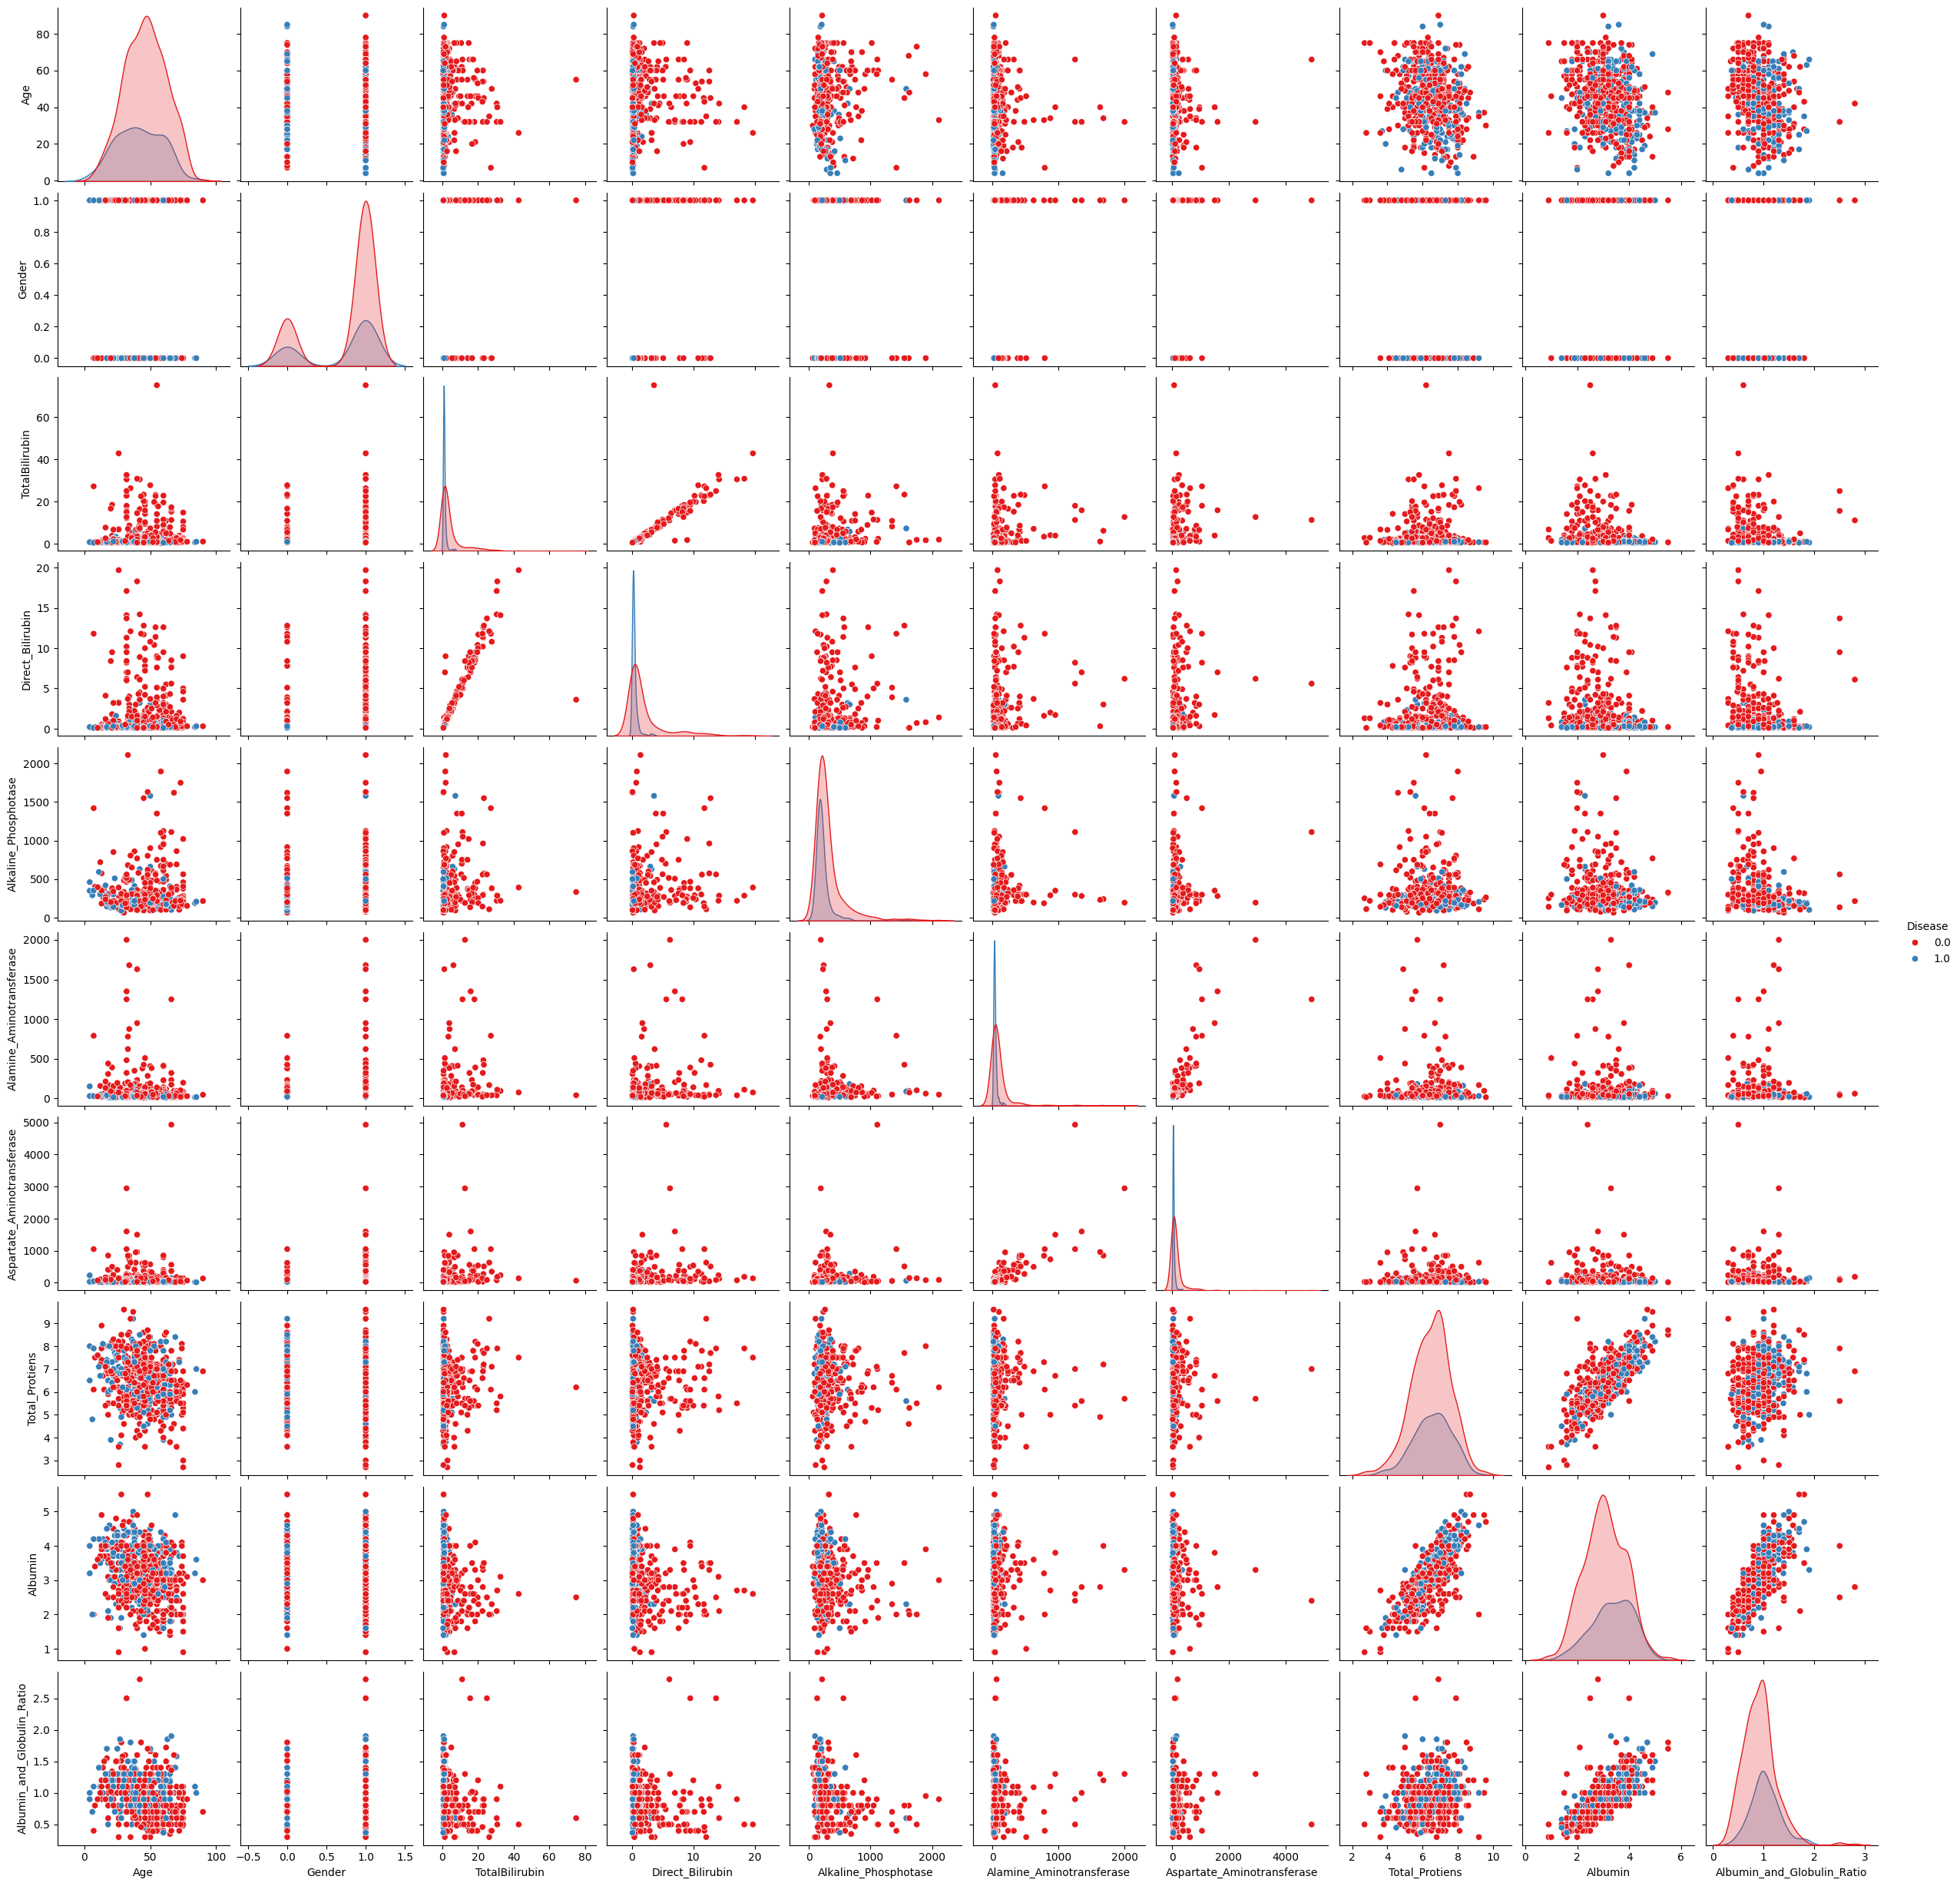

In [14]:
import seaborn as sns

sns.pairplot(liver[['Age', 'Gender', 'TotalBilirubin', 'Direct_Bilirubin',
                    'Alkaline_Phosphotase', 'Alamine_Aminotransferase',	'Aspartate_Aminotransferase',
                    'Total_Protiens',	'Albumin',	'Albumin_and_Globulin_Ratio', 'Disease']],
                    hue = 'Disease', palette = "Set1")

На представленной матрице зависимостей (матрица рассеяния) можно сделать следующие выводы:
- болезнь печени встречается у людей с низким показателем "TotalBilirubin", "Direct_Bilirubin", "Alamine Aminotransferase" и "Aspartate Aminotransferase";
- болезнь печени встречается во всех возрастах примерно одинаково, поэтому данный признак в обучение модели не включается;
- наличие болезни печени не зависит от пола, поэтому данный признак тоже не включается в обучение модели;
- наблюдается сильная положительная корреляция между "TotalBilirubin" и "DirectBilirubin";
- наблюдается умеренная положительная корреляция между "Total_Protiens" и "Albumin";
- наблюдается умеренная положительная корреляция между "Albumin" и "Albumin_and_Clobuline_Ratio".

Строится тепловая карта корреляции числовых признаков для определения коллинеарности.

<Axes: >

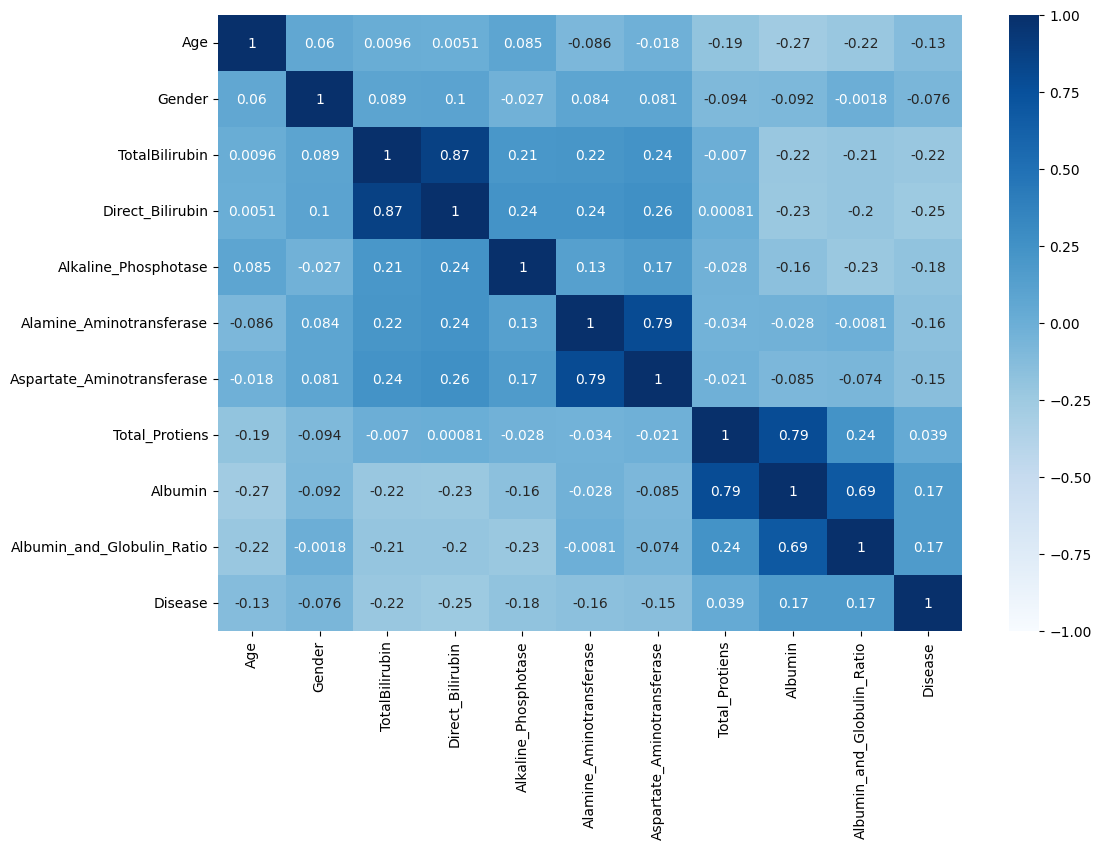

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(liver.corr(numeric_only = True),
            annot = True, vmin=-1, vmax=1, center= 0, cmap = 'Blues')

По тепловой карте видно:
- 'TotalBilirubin' и 'Direct_Bilirubin' являются по сути одним и тем же (показатели билирубина), поэтому между ними силная корреляция, что говорит о коллинеарности признаков, поэтому один из признаков убирается при обучении модели, в данном случае не учитывается 'Direct_Bilirubin';
- между 'Alamine_Aminotransferase' и 'Aspartate_Aminotransferase' наблюдается высокая корреляция, но данные признакми отвечают за разные показатели, поэтому оба применяются при обучении;
- 'Total_Proteins' и 'Albumin' имеют высокую корреляцию, что говорит об их коллинеарности;
- 'Albumin' и 'Albumin_and_Globulin_Ratio' также имеют значительную корреляцию, но они представляют разные данные по разному (если основываться медицинских формулах): 'Albumin' — абсолютное значение альбумина.
'Albumin_and_Globulin_Ratio' — соотношение альбумина к глобулинам.

В итоге 'Total_Proteins' исключается при обучении модели, так как этот показатель полностью зависит от других признаков, а
'Albumin', 'Albumin_and_Globulin_Ratio' оставляются.

### Классификация

Данные делятся на тренировочные и тестовые.

In [16]:
from sklearn.model_selection import train_test_split

liver_columns = ['TotalBilirubin', 'Alkaline_Phosphotase',
             'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
             'Albumin',	'Albumin_and_Globulin_Ratio']

target = liver['Disease']
liver = pd.DataFrame(liver, columns = liver_columns)


X_train, X_test, y_train, y_test = train_test_split(liver, target, test_size=0.2, random_state=1)

print("X_train:")
display(X_train.head(3))
print("X_test:")
display(X_test.head(3))

X_train:


,TotalBilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Albumin,Albumin_and_Globulin_Ratio
324,0.8,198.0,36,32.0,4.0,1.3
382,0.7,162.0,24,20.0,3.2,1.0
400,4.2,450.0,69,50.0,3.0,0.7


X_test:


,TotalBilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Albumin,Albumin_and_Globulin_Ratio
47,0.7,170.0,21,14.0,2.5,0.7
246,0.8,185.0,25,21.0,3.0,0.7
509,3.5,298.0,68,200.0,3.4,0.9


Выполняется стандартизация числовых данных с помощью `StandardScaler`.

In [17]:
from sklearn.preprocessing import StandardScaler

scaler_liver = StandardScaler()

X_train_scaled = scaler_liver.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = liver_columns)

X_test_scaled = scaler_liver.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = liver_columns)

X_train_scaled.describe().round(2)

,TotalBilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Albumin,Albumin_and_Globulin_Ratio
count,451.00,451.00,451.00,451.00,451.00,451.00
mean,-0.00,0.00,0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.46,-0.96,-0.37,-0.33,-2.77,-2.00
25%,-0.40,-0.48,-0.31,-0.28,-0.78,-0.76
50%,-0.37,-0.35,-0.24,-0.23,-0.03,-0.14
75%,-0.11,0.02,-0.10,-0.08,0.84,0.49
max,10.88,7.55,10.04,15.28,2.95,5.77


Стардартизация была проведена успешно, все средние равны нулю, а стандартнык отклонения равны 1.

Для дальнейшей работы заранее импортируются все необходимые библиотеки.

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.classifier import ROCAUC

from sklearn.metrics import (
    confusion_matrix, # TN, TP, FN, FP -- для подсчёта TNR, точности и полноты для бинарной классификации
    roc_auc_score, # ROC AUC
    roc_curve, # возвращает FPR, TPR и пороговые значения, которые использовались при подсчёте FPR и TPR
    average_precision_score, # PR AUC
    precision_recall_curve, # возвращает точность, полноту и пороговые значения,
                            # которые использовались при подсчёте точности и полноты
    classification_report # отчёт о классификации, показывающий основные показатели
    )

#### Метод k- ближайших соседей

Производится обучение модели методом KNN и предсказание целевой переменной. Также выводятся метрики качества и матрица неточностей.

              precision    recall  f1-score   support

         0.0       0.78      0.81      0.80        80
         1.0       0.50      0.45      0.48        33

    accuracy                           0.71       113
   macro avg       0.64      0.63      0.64       113
weighted avg       0.70      0.71      0.70       113



Text(0.5, 14.722222222222216, 'Предсказанные значения')

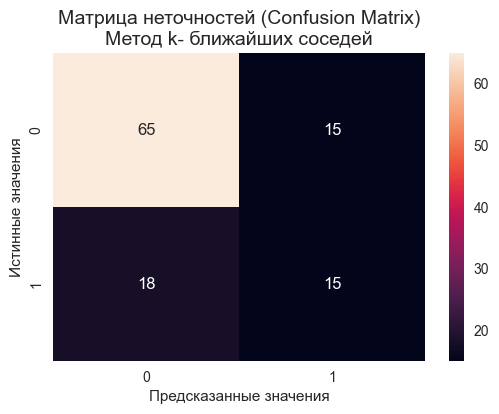

In [19]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

print(classification_report(y_test, y_pred_knn))

knn_model_matrix = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6,4))
sns.heatmap(knn_model_matrix, annot=True)
plt.title("Матрица неточностей (Confusion Matrix)\nМетод k- ближайших соседей", fontsize=14);
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')

По метрикам и матрице ошибок делаются выводы:
- Точность (precision) для класса 0 (не болен) составляет 78%, что говорит о высокой точности предсказания здоровых пациентов.
- Точность для класса 1 (болен) равна 50%, что говорит о низкой способности модели распознать больного чпеловека.
- Полнота (Recall) для класса 0 указывает на то, что модель правильно распознала 81% из всех реальных наблюдений этого класса, что является средним показателем полноты.
- Полнота для класса 1 указывает на то, что 45% реальных случаев болезни были правильно идентифицированы моделью. Модель не успевает выявить значительное число заболеваний.
- F1 для класса 0: 0.80 — гармоническое среднее показывает хорошую точность и полноту.
- F1 для класса 1: 0.48 — низкое значение указывает на необходимость улучшения методов определения заболеваний.
- accuracy (доля правильных предсказаний) равна 71% — это низкий показатель.
- macro avg (средние метрики - точность, полнота и f1-score) рассчитывается по всем классам равен 0.64. Такой маленький показатель указывает на то, что модель не справляется с определением классов, особенно менее представленного.
- weighted avg (средние метрики, взвешенные по количеству наблюдений в каждом классе) равен 0.70, что указывает на то, что модель лучше классифицирует класс с большим количеством примеров (не больные), но все еще имеет проблемы с классом 1 (болен).


По матрице ошибок видно:
- Истинные отрицательные (TN): 65 — количество правильно предсказанных здоровых пациентов.
- Ложные положительные (FP): 15 — количество здоровых, ошибочно определённых как больные.
- Ложные отрицательные (FN): 18 — количество больных, ошибочно определённых как здоровые.
- Истинные положительные (TP): 15 — количество правильно предсказанных больных.

Модель чаще предсказывает, что человек ложно здоров, чем то, что он действительно болен, что говорит об очень плохой обученности модели.

В общем показатели метрик кажутся приемлемым, но многие ложные классификации уменьшают полезность предсказаний, так как большинство больных определяются как здоровые. В медицине особенно важно определить, что у человека есть болезнь, поэтому данную модель лучше не использовать на практике.

#### Дерево решений

Производится обучение модели методом дерева решений и предсказание целевой переменной. Также выводятся метрики качества и матрица неточностей.

              precision    recall  f1-score   support

         0.0       0.75      0.64      0.69        80
         1.0       0.36      0.48      0.41        33

    accuracy                           0.59       113
   macro avg       0.55      0.56      0.55       113
weighted avg       0.63      0.59      0.61       113



Text(0.5, 14.722222222222216, 'Предсказанные значения')

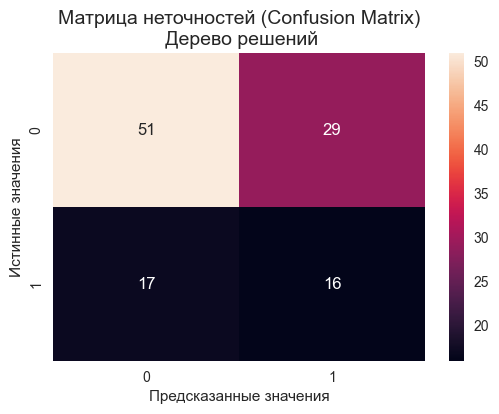

In [20]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_scaled, y_train)
y_pred_tree = tree_model.predict(X_test_scaled)

print(classification_report(y_test, y_pred_tree))

tree_model_matrix = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(6,4))
sns.heatmap(tree_model_matrix, annot=True)
plt.title("Матрица неточностей (Confusion Matrix)\n Дерево решений", fontsize=14);
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')

По метрикам качества модели дерева решений можно сделать вывод, что она значительно хуже классифицирует наблюдения, чем модель К-ближайших соседей.

Матрица ошибок показывает большее кол-во ошибочно больных предсказаний и такое же высокое число ложноположительных классификаций, что указывает на низкую способность модели различать группы.

#### Логистическая регрессия

Производится обучение модели методом логистической регрессии и предсказание целевой переменной. Также выводятся метрики качества и матрица неточностей.

              precision    recall  f1-score   support

         0.0       0.72      0.99      0.83        80
         1.0       0.67      0.06      0.11        33

    accuracy                           0.72       113
   macro avg       0.69      0.52      0.47       113
weighted avg       0.70      0.72      0.62       113



Text(0.5, 14.722222222222216, 'Предсказанные значения')

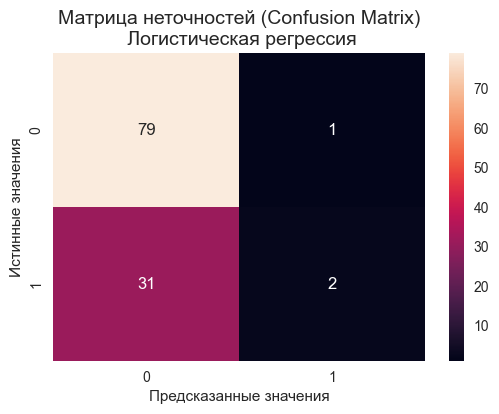

In [21]:
logistic_model = LogisticRegression(random_state = 1)
logistic_model.fit(X_train_scaled, y_train)
y_pred_logistic = logistic_model.predict(X_test_scaled)

print(classification_report(y_test, y_pred_logistic))

logistic_model_matrix = confusion_matrix(y_test, y_pred_logistic)
plt.figure(figsize=(6,4))
sns.heatmap(logistic_model_matrix, annot=True)
plt.title("Матрица неточностей (Confusion Matrix)\n Логистическая регрессия", fontsize=14);
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')

Модель логистической регрессии показывает чуть более приемлемые результаты.

По подсчитанным метрикам видно, что она намного точнее определяет здорового человека - из 80 здоровых было верно определено 79 здоровых пациентов.

Полнота модели для класса 0 (здоровых) стала 99%, что является высоким показателем. Модель правильно распознала 99% из всех реальных наблюдений этого класса. Но для класса 1 (больных) данный показатель снизился до 6%.
Показатель F1 изменился соответственно для обоих классов.

Accuracy стал более высоким, что говорит о том, что доля правильных предсказаний повысилась.

Модель редко ошибается, когда человек здоров, но если человек болен, то она с очень высокой вероятность предскажет, что он здоров, что является очень плохим показателем.

#### Случайный лес

Производится обучение модели методом случайного леса и предсказание целевой переменной. Также выводятся метрики качества и матрица неточностей.

              precision    recall  f1-score   support

         0.0       0.76      0.79      0.77        80
         1.0       0.43      0.39      0.41        33

    accuracy                           0.67       113
   macro avg       0.60      0.59      0.59       113
weighted avg       0.66      0.67      0.67       113



Text(0.5, 14.722222222222216, 'Случайный лес')

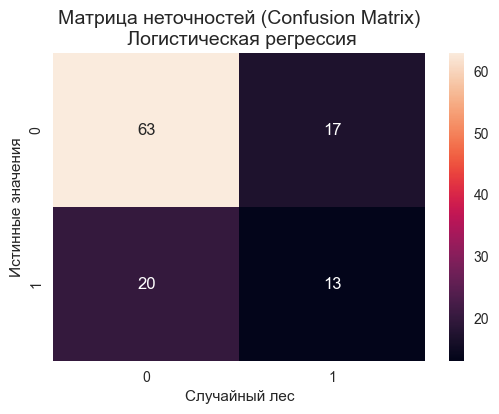

In [22]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

print(classification_report(y_test, y_pred_rf))

rf_model_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(rf_model_matrix, annot=True)
plt.title("Матрица неточностей (Confusion Matrix)\n Логистическая регрессия", fontsize=14);
plt.ylabel('Истинные значения')
plt.xlabel('Случайный лес')

Модель случайного леса имеет очень схожие показатели с моделью К-ближайших соседей.

Единственная проблема в том, что данная модель немного чаще ошибается при определении больного человека, что говорит о том, что данная модель также не может использоваться на практике из-за плохих показателей точности классификации.

#### Построение ROC-кривых

Далее строятся графики ROC-кривых для каждого метода на одном графике (4 линии на одном графике) для дальнейшего сравнения.

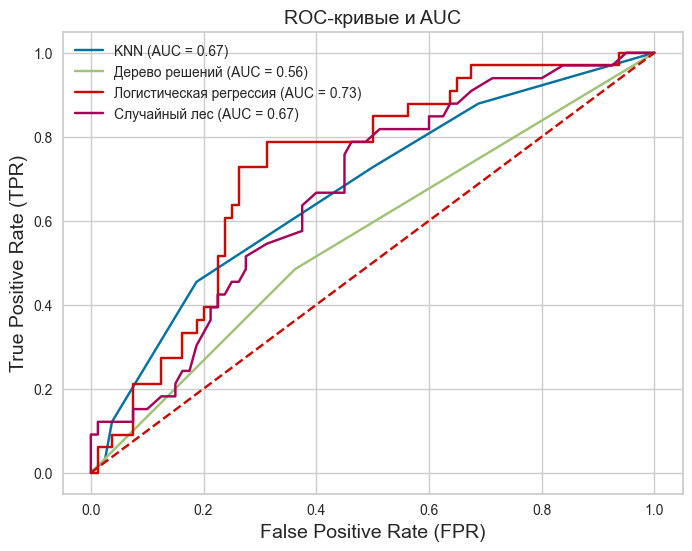

In [23]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_proba_1 = knn_model.predict_proba(X_test_scaled)[:, 1]
y_proba_2 = tree_model.predict_proba(X_test_scaled)[:, 1]
y_proba_3 = logistic_model.predict_proba(X_test_scaled)[:, 1]
y_proba_4 = rf_model.predict_proba(X_test_scaled)[:, 1]

plt.figure(figsize=(8, 6))
plt.title("ROC-кривые и AUC", fontsize=14)
plt.xlabel("False Positive Rate (FPR)", fontsize=14)
plt.ylabel("True Positive Rate (TPR)", fontsize=14)

fpr, tpr, _ = roc_curve(y_test, y_proba_1)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'KNN (AUC = {round(roc_auc, 2)})')

fpr, tpr, _ = roc_curve(y_test, y_proba_2)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Дерево решений (AUC = {round(roc_auc, 2)})')

fpr, tpr, _ = roc_curve(y_test, y_proba_3)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Логистическая регрессия (AUC = {roc_auc:.2f})')

fpr, tpr, _ = roc_curve(y_test, y_proba_4)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Случайный лес (AUC = {roc_auc:.2f})')

plt.legend(loc="upper left", fontsize=10)
plt.plot([0, 1], [0, 1], 'r--')
plt.axis('tight')
plt.show()

На основании ROC-кривых и значений AUC для различных моделей, можно сделать следующие выводы:
- логистическая регрессия показала наилучшие результаты с AUC = 0.73, что указывает на её более высокую способность точно различать больных и здоровых людей;
- KNN и случайный лес, обе с AUC = 0.67, демонстрируют среднюю эффективность в классификации, что говорит о том, что они также могут быть полезными, но не столь надежными, как логистическая регрессия;
- дерево решений с AUC = 0.55 имеет наименьшую производительность, что указывает на его низкую способность к точной классификации исследуемых данных.

Для задачи классификации больных или здоровых людей логистическая регрессия по метрикам является лучшим вариантом из всех рассмотренных, но в области медицинских заключений важным файтором является определение наличия болезни у пациента, поэтому для данного набора данных наиболее подходящей моделью является модель KNN, которая имеет хорошие покатели метрик и лучше определяет больных людей. Несмотря на это она все равно показывает очень плохие результаты, из-за чего не годится для использования на практике.

## Вывод

В ходе выполнения лабораторной работы были изучены методы и алгоритмы классификации, направленные на предсказание целевой переменной на основе различных характеристик данных.

В первой части работы был загружен набор данных и проведена предварительная обработка, включая очистку и стандартизацию числовых значений с использованием StandardScaler. Затем целевая переменная была выделена, и для визуализации зависимостей между признаками была построена матрица диаграмм рассеяния, где целевая переменная была обозначена различными цветами.

Во второй части работы данные были разделены на тренировочный и тестовый наборы с помощью train_test_split. На этом этапе была разработана предсказательная модель с использованием различных методов: K-ближайшие соседи (KNN), дерево решений, логистическая регрессия и случайный лес. Оценка качества моделей была проведена с использованием различных метрик. Для каждого метода была построена матрица неточностей, с помощью которой каждая модель оценивалась. Затем были построены ROC-кривые для всех моделей, что позволило сравнить их производительность по значению AUC.

По результатам анализа моделей, логистическая регрессия показала наилучшие показатели метрик качества и AUC, но из-за специфики набора данных и сферы, в которой должны использоваться данные модели, было выявлено, что больше всего подходит модель К-ближайших соседей. Методы дерева рещений и случайного леса имели довольно плохие метрики качества и AUC.

В целом, с медицинской точки зрения лучшей моделью для данного набора данных стала модель KNN. Единственная проблема в том, что данная модель часто ошибается при предсказании здорового человека, а если человек болен, то она с 50% вероятностью правильно предскажет этот факт. Данная модель подходит больше остальных, так как в мединицине важнее предсказать именно наличие болезни, с чем остальные модели справляются хуже.

## Выполнение дополнительного задания


Осуществить подбор оптимальных параметров с помощью `GridSearchCV` для случайного леса. Сравнить качество модели для подобранных параметров и любых других.

In [ ]:
from sklearn.model_selection import GridSearchCV

rf_model_grid = RandomForestClassifier(random_state=42)
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
grid_search = GridSearchCV(
    estimator=rf_model_grid,
    param_grid=params,
    scoring='accuracy',
    cv=5,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)
rf_model_grid = grid_search.best_estimator_
y_pred_grid = rf_model_grid.predict(X_test_scaled)

print("Метрики при подборе параметров с помощью GridSeachCV:\n", classification_report(y_test, y_pred_grid))
print("Метрики без перебора гипер параметров:\n", classification_report(y_test, y_pred_rf))

Fitting 5 folds for each of 108 candidates, totalling 540 fits


По подсчитанным метрикам можно сделать вывод, что подбор оптимальных параметров с помощью `GridSearchCV` для случайного леса не смог подобрать такие параметры, при которых модель показала бы более точные результаты. Это может означать, что проблема плохой классификации данной моделью объясняется не ее параметрами, а, возможно, специфичностью самих данных.